# Bank Telemarketing Success

#### Tanisha Mahajan, Gaurav Singh

## Introduction

This data was collected by Moro et al. for a Portuguese banking institution for two years between from May 2008 to November 2010 using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology.<br>
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the bank term deposit would be or not be subscribed.<br><br>
The primary goal of this project is to predict whether a customer will subscribe for a term deposit or not. This is also the primary reason for data collection. The secondary goal is to predict the consumer confidence index (CCI). CCI will be valuable for the bank to decide whether the customer feels optimistic about the economy and would be willing to spend or take credit in form of loans, etc.
This dataset was taken on 12/09/2020 from https://archive.ics.uci.edu/ml/datasets/Bank+Marketing.

## Initial Data Exploration

In [812]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [585]:
sns.set()
rcParams['figure.figsize'] = 11.7,8.27
sns.set_context('talk')

In [852]:
df1 = pd.read_csv("D:/bank-additional-full.csv", delimiter=';')

In [541]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [542]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [543]:
df1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


There is quite a difference between numeric values. We might need to scale the data depending on the model we will use

In [544]:
df1.shape

(41188, 21)

In [853]:
(df1.select_dtypes(include='object') =="").sum().sum()

0

There are no empty string in our dataset

In [854]:
df1.isna().sum().sum()

0

There are no N/A values in our dataset

The dataset is rougly divided as follows:<br>
Columns 0 to 6:   Bank client data<br>
Columns 7 to 11:  Related to last contact made with customers (for the current campaign)<br>
Columns 12 to 14: Related to the previous campaign<br>
Columns 15 to 19: Social and economic context attributes<br>
Column 20:        Outcome of the campaign<br><br>
Out of these, columns 0 to 14 and column 20 are categorical and 16 to 19 are numeric. There are around 41K entries making this a medium sized dataset. There are no NA values or empty strings in the data.

## Visualisation

To begin with we would like to look at the age group this campaign is targetting.

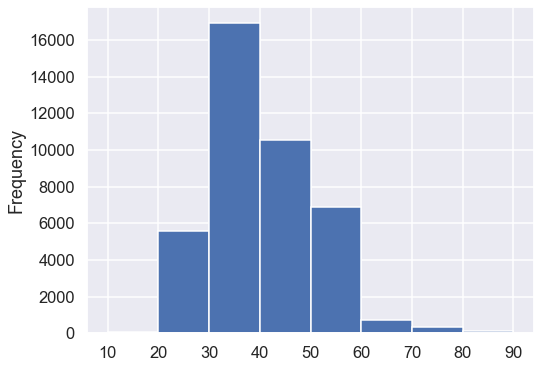

In [546]:
df1['age'].plot.hist(bins=np.arange(10,100,10));

Looks like most of the people are aged between 30 and 40. This age group is supposed to include young professionals.

Now let us see how people tend to invest in a term deposit given their occupation.

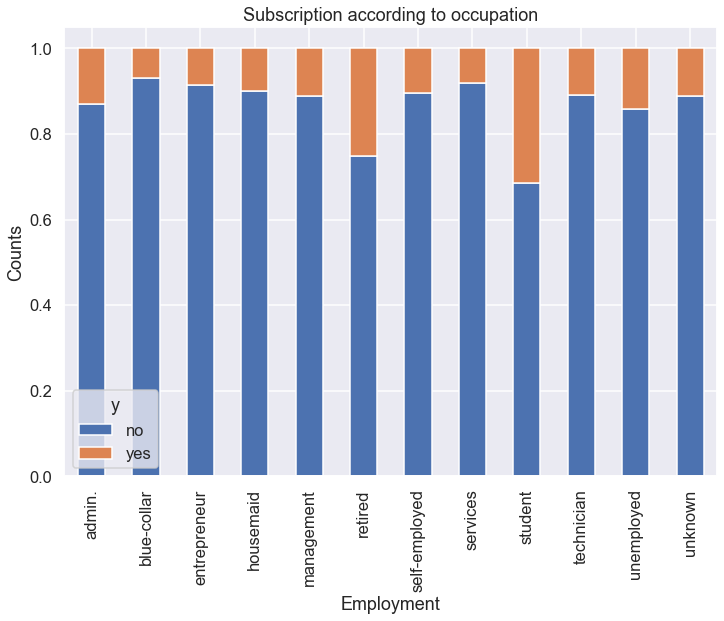

In [874]:
x="job"
y="y"
t=pd.crosstab(df1[x], df1[y])
t=t.div(df1[x].value_counts(), axis=0)  
t.plot.bar(stacked=True).set(title='Subscription according to occupation',xlabel='Employment',ylabel='Counts');

We observe that students tend to subscribe for a term deposit followed by retired persons. This might be due to students wanting to save up for their future and retired persons wanting to invest their savings.

Now we'll see how the number of calls made to the client influence their chances of subscribing.

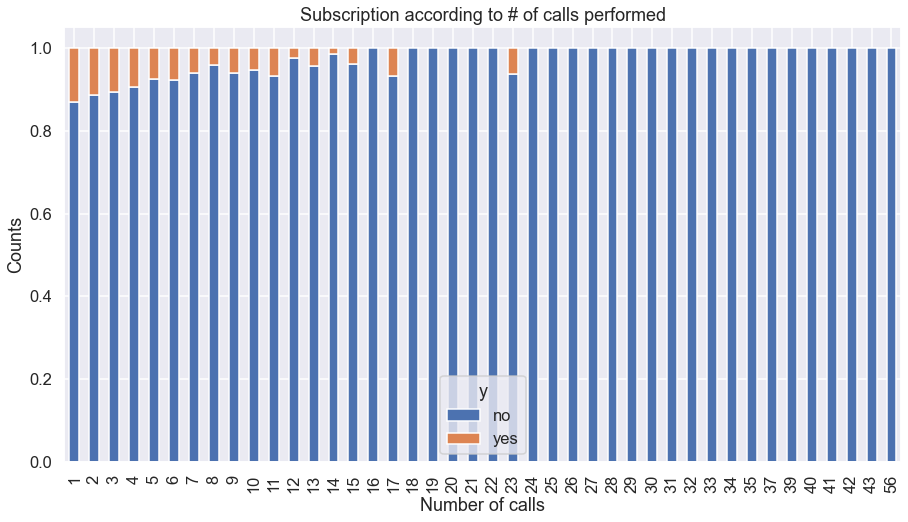

In [877]:
x="campaign"
y="y"
t=pd.crosstab(df1[x], df1[y])
t=t.div(df1[x].value_counts(), axis=0)  
t.plot.bar(stacked=True).set(title='Subscription according to # of calls performed',xlabel='Number of calls',ylabel='Counts');
fig = plt.gcf()
fig.set_size_inches(15, 8);

We see that making only 1 call was the most effictive to have a customer subscribe. We also see a decreasing trend; meaning more number of calls do not translate to a higher chance of subscription.<br>
A customer is more likely to subscribe if the calls are kept less than 17. Perhaps more than that makes the customers annoyed.

While we are at it let's also look at whether customers who were called during the previous campaign are more likely to subscribe during this campaign or not

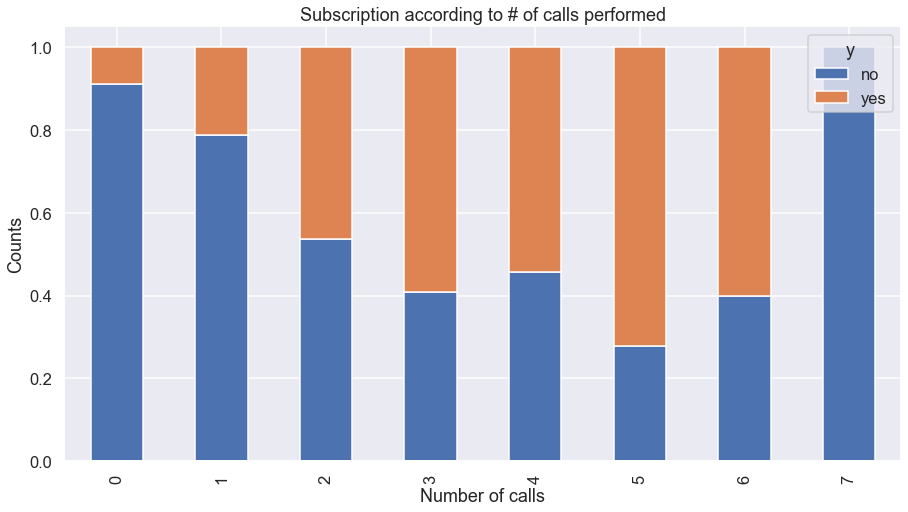

In [879]:
x="previous"
y="y"
t=pd.crosstab(df1[x], df1[y])
t=t.div(df1[x].value_counts(), axis=0)  
t.plot.bar(stacked=True).set(title='Subscription according to # of calls performed',xlabel='Number of calls',ylabel='Counts');
fig = plt.gcf()
fig.set_size_inches(15, 8);

Looks like people who were called a few times during the last campaign are more likely to subscribe during this campaign

## Cleaning and Preprocessing

Let's begin by dropping duplicate rows in our dataset

In [550]:
df1 = df1.drop_duplicates()
df1.shape

(41176, 21)

We are left with 41176 rows in our dataset. Doesn't look like there were that many duplicate rows in the dataset

Clubbing basic education values in the education column.

In [551]:
df1['education']=df1['education'].str.replace('basic.[0-9]y','basic',regex=True)

Remove 'default' column since 79% values are negative, 20.87% unknown and only 0.13% positive values. There is severe imbalance due to which we choose to drop this column.

In [552]:
df1.drop('default',axis=1,inplace=True)

According to the dataset documentation, the attribute 'duration' highly affects the output target (e.g., if duration=0 then y='no'). Thus to have a good predictive model, based on a number of features, we decide to drop 'duration' column.

In [553]:
df1.drop('duration',axis=1,inplace=True)

Convert target label to numeric

In [554]:
df1['y'] = df1['y'].astype('category').cat.codes

Generating dummy variables for categorical columns.

In [555]:
df1 = pd.get_dummies(df1, columns=['job','education','marital','housing','loan','contact','poutcome'],drop_first=True)

We are going to preprocess our cyclic features 'month' and 'day_of_week' to provide the model with the most accurate data as possible

In [556]:
dict_map = {'mar':3 , 'apr': 4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
df1['month'] = df1['month'].map(dict_map)
df1['month'] = df1['month'].astype('int64')

In [557]:
dict_map = {'mon':1 , 'tue': 2, 'wed':3, 'thu':4, 'fri':5}
df1['day_of_week'] = df1['day_of_week'].map(dict_map)
df1['day_of_week'] = df1['day_of_week'].astype('int64')

In [558]:
df1['month_sin'] = np.sin((df1.month-1)*(2.*np.pi/12))
df1['month_cos'] = np.cos((df1.month-1)*(2.*np.pi/12))

In [559]:
df1['DOW_sin'] = np.sin((df1.day_of_week-1)*(2.*np.pi/7))
df1['DOW_cos'] = np.cos((df1.day_of_week-1)*(2.*np.pi/7))

Let's drop the columns now that the preprocessing is complete

In [560]:
df1.drop(['day_of_week','month'],axis=1,inplace=True)

# Machine Learning

## Categorical

Code for printing the confusion matrix

In [561]:
# function to print confusion matrix

def print_conf_mtx(y_true, y_pred, classes=None):
    if not classes:
        classes = ['neg', 'pos']
    # formatting
    max_class_len = max([len(s) for s in classes])
    m = max(max_class_len, len('predicted')//2 + 1)
    n = max(len('actual')+1, max_class_len)
    left = '{:<10s}'.replace('10',str(n))
    right = '{:>10s}'.replace('10',str(m))
    big_center = '{:^20s}'.replace('20',str(m*2))
    cm = confusion_matrix(y_test, y_pred)
    print((left+big_center).format('', 'predicted'))
    print((left+right+right).format('actual', classes[0], classes[1]))
    print((left+right+right).format(classes[0], str(cm[0,0]), str(cm[0,1])))
    print((left+right+right).format(classes[1], str(cm[1,0]), str(cm[1,1])))

Let's start with the building our first Logistic Regression model

In [562]:
pred = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'poutcome_nonexistent',
       'poutcome_success', 'month_sin', 'month_cos', 'DOW_sin', 'DOW_cos']
X_tmp = df1[pred]
y_tmp = df1['y']

Since there is significant imbalance in our dataset we are going to use oversampling

In [563]:
over_sampler = RandomOverSampler(random_state=0,sampling_strategy='minority')

In [564]:
X, y = over_sampler.fit_sample(X_tmp, y_tmp)

In [565]:
# Build the resulting under sampled dataframe
X = pd.DataFrame(X)

# Restore the column names
X.columns = X_tmp.columns

# Restore the y values
y = pd.Series(y)

In [566]:
X = X.values
y = y.values

Let's do a split of 30% test and 70% training data

In [567]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Scale the data to prevent any convergence problems and allow faster convergence

In [568]:
scaler = StandardScaler()
X_train[:,0:9] = scaler.fit_transform(X_train[:,0:9])
X_test[:,0:9] = scaler.transform(X_test[:,0:9])

Let's also look at the baseline accuracy

In [570]:
# Baseline accuracy
blind_prediction = np.median(y_train)
(y_test == blind_prediction).mean().round(2)

0.5

We get a baseline accuracy of around 50%

Building the Logistic Regression Model and getting the predictions as well as the prediction probabilities

In [569]:
# Logistic Regression Model
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)
predicts = clf.predict(X_test)
prob = clf.predict_proba(X_test)[:,1]

In [571]:
clf.score(X_test,y_test).round(5)

0.72878

Our Logistic Regression Model gave us an accuracy of around 72.8%

Let's see whether we can improve our accuracy using GridSearch

In [572]:
grid_values = {'penalty': ['l2','l1'],'C':np.logspace(-3,3,7),'solver':['liblinear']}
grid_clf_acc = GridSearchCV(clf, grid_values)
grid_clf_acc.fit(X_train, y_train);

In [573]:
print("tuned hyperparameters :(best parameters) ",grid_clf_acc.best_params_)

tuned hyperparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [574]:
grid_clf_acc.predict(X_test)
grid_clf_acc.score(X_test,y_test).round(5)

0.72882

There's a slight and negligible increase in accuracy after using GridSearch

Let's see how much accuracy we can squeeze out using Forward feature selection

In [575]:
#Forward Feature Selection
remaining = list(range(X_train.shape[1]))
selected = []
n = 10
while len(selected) < n:
    # find the single features that works best in conjunction
    # with the already selected features
    accuracy_max = 0
    for i in remaining:
        X_i = X_train[:,selected+[i]]
        score = cross_val_score(LogisticRegression(C= 10, penalty= 'l2', solver= 'liblinear'), X_i, y_train, cv=10,scoring='accuracy')
        accuracy_score = score.mean()
        if accuracy_score > accuracy_max:
            accuracy_max = accuracy_score
            i_min = i 
    remaining.remove(i_min)
    selected.append(i_min)
    print('Feature Name: {}; Accuracy score: {:.5f}'.format(df1[pred].columns[i_min], accuracy_max))

Feature Name: emp.var.rate; Accuracy score: 0.71680
Feature Name: job_student; Accuracy score: 0.71699
Feature Name: age; Accuracy score: 0.71699
Feature Name: cons.price.idx; Accuracy score: 0.71739
Feature Name: month_sin; Accuracy score: 0.72116
Feature Name: job_blue-collar; Accuracy score: 0.72831
Feature Name: job_services; Accuracy score: 0.73003
Feature Name: poutcome_success; Accuracy score: 0.73246
Feature Name: DOW_sin; Accuracy score: 0.73621
Feature Name: job_entrepreneur; Accuracy score: 0.73649


Our accuracy increased by almost 1% and we can see the 10 best features that impact our accuracy

As this dataset is significantly imbalanced we are going to use f1-score and AUC score to determine how good our model is instead of accuracy. Accuracy might not be the best score to look at with a dataset of this type

Let's look at the confusion matrix for the default threshold value of 0.5

In [576]:
print_conf_mtx(y_test, predicts)

       predicted 
actual   neg  pos
neg     8660 2204
pos     3742 7317


In [581]:
print(classification_report(y_test,predicts))

              precision    recall  f1-score   support

           0       0.70      0.80      0.74     10864
           1       0.77      0.66      0.71     11059

    accuracy                           0.73     21923
   macro avg       0.73      0.73      0.73     21923
weighted avg       0.73      0.73      0.73     21923



Looks like we are getting a precision value of 77% and recall of 66% and an f1-score of 0.71 which is decent

In [578]:
#Function for PR threshold values
def get_pr_values(threshold):
    for i in threshold:
        prob = clf.predict_proba(X_test)[:,1] 
        num_pred = (prob > i).astype(int)
        cmat = confusion_matrix(y_test,num_pred)
        precision = cmat[1,1]/(cmat[1,1]+cmat[0,1])
        recall = cmat[1,1]/(cmat[1,0]+cmat[1,1])
        print('threshold: ',i, ' ,Precision: ',precision,' ,Recall: ',recall)

Let's look at some threshold values

In [631]:
thresholds=np.linspace(0.45,0.56,10)
get_pr_values(thresholds)

threshold:  0.45  ,Precision:  0.7440147329650092  ,Recall:  0.6940953069897821
threshold:  0.46222222222222226  ,Precision:  0.7501981767736822  ,Recall:  0.6846007776471652
threshold:  0.47444444444444445  ,Precision:  0.7553964091184184  ,Recall:  0.6771860023510263
threshold:  0.4866666666666667  ,Precision:  0.7619488128276287  ,Recall:  0.6703137715887513
threshold:  0.49888888888888894  ,Precision:  0.7675443197314591  ,Recall:  0.6616330590469301
threshold:  0.5111111111111112  ,Precision:  0.773086789226165  ,Recall:  0.6540374355728366
threshold:  0.5233333333333334  ,Precision:  0.7820214768072623  ,Recall:  0.6387557645356723
threshold:  0.5355555555555556  ,Precision:  0.7915521978021978  ,Recall:  0.6252825752780541
threshold:  0.5477777777777778  ,Precision:  0.804332301832897  ,Recall:  0.6110859933086175
threshold:  0.56  ,Precision:  0.8123076923076923  ,Recall:  0.5967989872502034


Threshold value of 0.547 seems to give us a good tradeoff with 80% precision and 61% recall. Let's plot the confusion matrix with that threshold

In [635]:
new_pred =prob>0.547
print_conf_mtx(y_test, new_pred)

       predicted 
actual   neg  pos
neg     9208 1656
pos     4289 6770


Now let's plot the precision recall curve

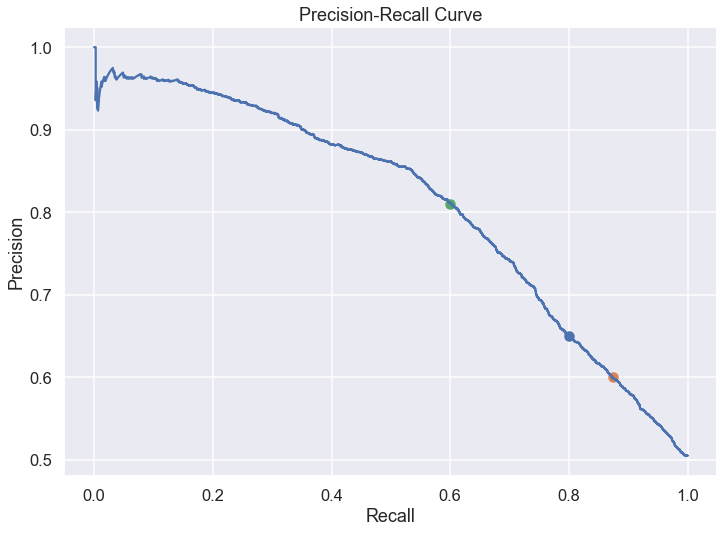

In [630]:
precision,recall,thresholds = precision_recall_curve(y_test,prob)
plt.plot(recall,precision)
plt.scatter(0.8,0.65)
plt.scatter(0.875,0.6)
plt.scatter(0.6,0.81)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve');

We can see some good points on the plot. Since there is significant imbalance we are going to prefer PR curves over ROC curves

Now let's plot the ROC curve

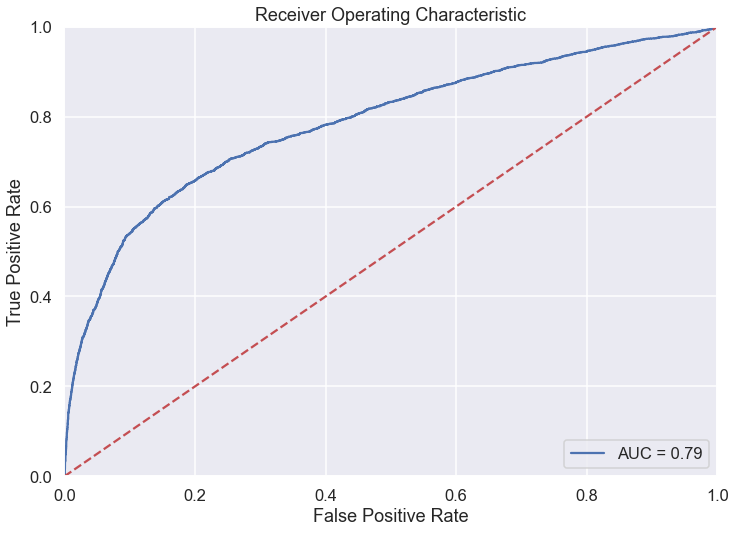

In [587]:
fpr, tpr, threshold = roc_curve(y_test, prob)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

We are interested in the AUC score which is 0.79 which is pretty good for this dataset.

We got f1-score of around 0.71 and AUC score of 0.79. This shows that we have a pretty decent model. Usually datasets with significant imbalance give high accuracy and almost no precision and recall. In such cases we have to look at other scores like f1-score and AUC.

Let's look at the learning curve of our Logistic Regression Model

In [590]:
# generate the data; average the values
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=10,scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

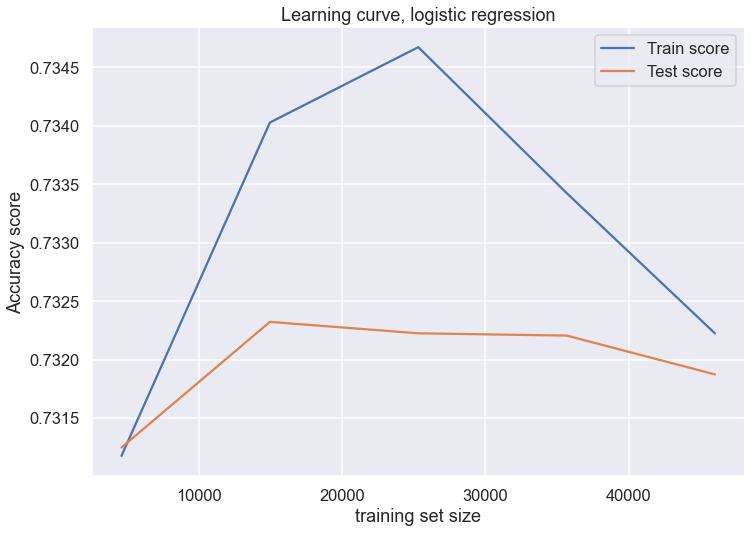

In [591]:
# plot the learning curve
plt.plot(train_sizes, train_scores_mean, label='Train score')
plt.plot(train_sizes, test_scores_mean, label='Test score')
plt.xlabel('training set size')
plt.ylabel('Accuracy score')
plt.title('Learning curve, logistic regression')
plt.legend();

Looking at the learning curve our model is all over the place with the initial sizes of data but at the end it looks okay with a little bias situation.

#### KNN Classification

Let's start by building our KNN model for classification and for comparison with our Logistic Regression Model

In [647]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

In [656]:
prob_knn = knn.predict_proba(X_test)[:,1]

In [648]:
knn.score(X_test,y_test).round(5)

0.85828

Looks like we get a really high accuracy compared to our Logistic Regression Model with a value of around 85.8%

In [649]:
grid_values = {'n_neighbors':[1,2,3,4,5,6,7,8]}
grid_clf_acc = GridSearchCV(knn, grid_values)
grid_clf_acc.fit(X_train, y_train);

In [650]:
print("tuned hyperparameters :(best parameters) ",grid_clf_acc.best_params_)

tuned hyperparameters :(best parameters)  {'n_neighbors': 1}


We get the best k value as 1. It seems to be overfitting

In [652]:
grid_clf_acc.predict(X_test)
grid_clf_acc.score(X_test,y_test).round(5)

0.9368699539296629

We managed to get the accuracy of upto 94% after GridSearch

Let's look at the confusion matrix

In [654]:
print_conf_mtx(y_test, pred_knn)

       predicted 
actual   neg  pos
neg     8117 2747
pos      36010699


In [653]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84     10864
           1       0.80      0.97      0.87     11059

    accuracy                           0.86     21923
   macro avg       0.88      0.86      0.86     21923
weighted avg       0.88      0.86      0.86     21923



Looks like we are getting pretty good precision and recall values of 80% and 97% and a high f1-score value of 0.87.

Now let's plot the precision recall curve

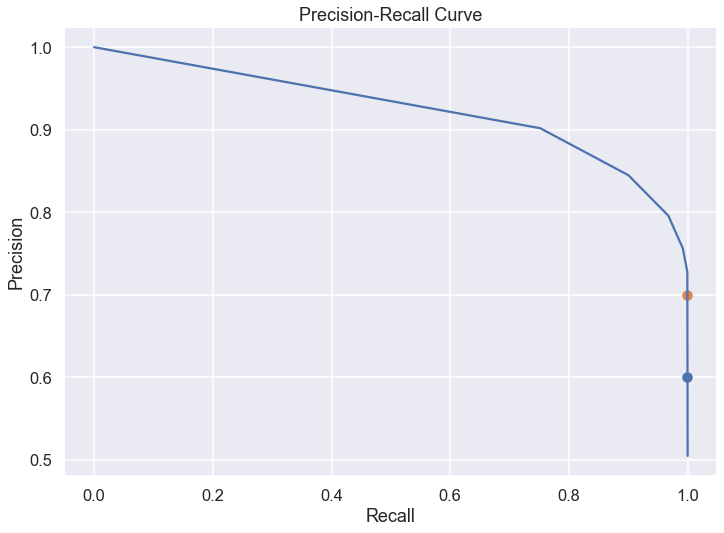

In [662]:
precision,recall,thresholds = precision_recall_curve(y_test,prob_knn)
plt.plot(recall,precision)
plt.scatter(0.999,0.6)
plt.scatter(0.999,0.7)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve');

There seems to be some really good values on the PR curve with almost 99% recall and 70% precision tradeoff

Now let's plot the ROC curve 

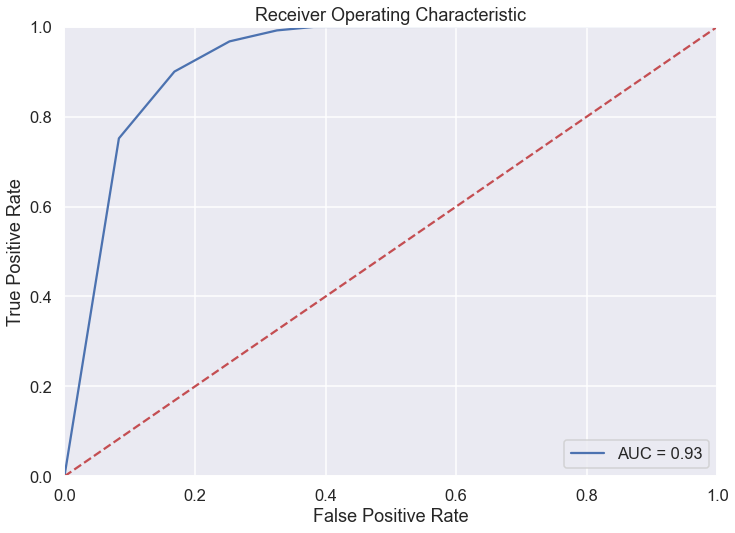

In [663]:
fpr, tpr, threshold = roc_curve(y_test, prob_knn)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

We get a really high AUC score of about 0.93 which is really good

We got f1-score of around 0.87 and AUC score of 0.93. This might be really good at first glance but as it is KNN it could easily be overfitting(as we saw even the grid search giving us the best parameter as k=1) and might not give as accurate values for the future data.

In [664]:
# generate the data; average the values
train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, cv=10,scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

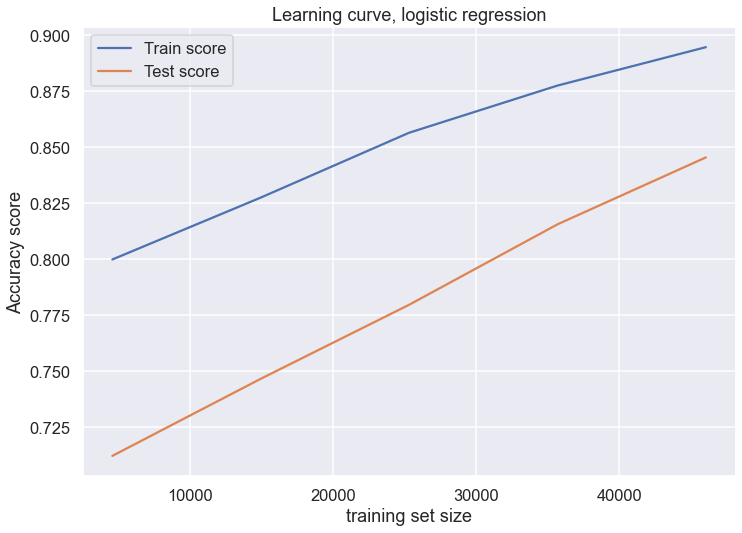

In [665]:
# plot the learning curve
plt.plot(train_sizes, train_scores_mean, label='Train score')
plt.plot(train_sizes, test_scores_mean, label='Test score')
plt.xlabel('training set size')
plt.ylabel('Accuracy score')
plt.title('Learning curve, logistic regression')
plt.legend();

This seems ike a situation of high variance. From this learning curve we can tell that the model is overfitting on this dataset

### Conclusion (Classification)

Even though KNN is scoring high on every scoring parameter compared to Logistic Regression it could be overfitting. Logistic Regression results seems to be more realistic when we consider this significant imbalanced dataset. We used the AUC and f1-score metric for diagonistics instead our accuracy as accuracy won't be an accurate measure of the efficiency of our model on predicting future data due to the significant imbalance

## Regression

Let's start with the Regression part. For this part we are going to predict the consumer confidence index.

##### Linear Regression

Let's start by building our model with all the features

In [831]:
pred = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'poutcome_nonexistent',
       'poutcome_success', 'month_sin', 'month_cos', 'DOW_sin', 'DOW_cos',
       'y_1']
X = df1[pred].values
y = df1['cons.conf.idx'].values

In [832]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [833]:
reg = LinearRegression()
reg.fit(X_train,y_train)
pred_reg = reg.predict(X_test)

Function to calculate test and train RMSE

In [834]:
def rmse(predicted, actual):
    return np.sqrt(((predicted - actual)**2).mean())

In [835]:
def get_train_test_rmse(regr, X_train, X_test, y_train, y_test):
    # YOUR CODE HERE
    regr.fit(X_train,y_train)
    predtest = regr.predict(X_test)
    predtrain = regr.predict(X_train)
    test_rmse = rmse(predtest,y_test)
    train_rmse = rmse(predtrain,y_train)
    return train_rmse,test_rmse

In [836]:
train_rmse,test_rmse=get_train_test_rmse(reg,X_train, X_test, y_train, y_test)

In [837]:
print('train_rmse: ',train_rmse, "\ntest_rmse: ",test_rmse)

train_rmse:  2.216841504118521 
test_rmse:  2.223281646980901


Doesn't look like there is much difference between the training and test RMSE. The model doesn't seem to be overfitting. Let's look at the R-squared value

In [838]:
# R-squared value
reg.score(X_test,y_test)

0.7692361343813386

We have a R-squared value of 0.76 which is okay for this dataset

Let's apply polynomial features and see if we can get any improvement in our model

In [839]:
pf = PolynomialFeatures(degree=2)
pf.fit(X)
X_poly = pf.transform(X)

In [840]:
X_poly.shape

(41176, 820)

We now have 820 features in our model

In [841]:
reg2 = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)
reg2.fit(X_train,y_train);

In [842]:
train_rmse,test_rmse=get_train_test_rmse(reg2,X_train, X_test, y_train, y_test)
print('train_rmse: ',train_rmse, "\ntest_rmse: ",test_rmse)

train_rmse:  0.35114716355614717 
test_rmse:  1.1446310443080339


train and test rmse for the polynomial model show a huge difference. This might indicate that our model is overfitting.

In [843]:
# R-squared value
reg2.score(X_test,y_test)

0.9388340281421352

R-squared value is also high with around 0.93 which is expected of a model that is overfitting

Let's try forward feature selection to get the RMSE of ten best features

In [844]:
remaining = list(range(X_train.shape[1]))
selected = []
n = 10
while len(selected) < n:
    # find the single features that works best in conjunction
    # with the already selected features
    rmse_min = 1e7
    for i in remaining:
        X_i = X_train[:,selected+[i]]
        scores = cross_val_score(LinearRegression(), X_i, y_train,
       scoring='neg_mean_squared_error', cv=5)
        rmse = np.sqrt(-scores.mean())
        if rmse < rmse_min:
            rmse_min = rmse
            i_min = i
       	 
    remaining.remove(i_min)
    selected.append(i_min)
    print('num features: {}; rmse: {:.2f}'.format(len(selected), rmse_min))


num features: 1; rmse: 3.45
num features: 2; rmse: 2.98
num features: 3; rmse: 2.83
num features: 4; rmse: 2.51
num features: 5; rmse: 2.35
num features: 6; rmse: 2.26
num features: 7; rmse: 2.18
num features: 8; rmse: 2.04
num features: 9; rmse: 1.96
num features: 10; rmse: 1.88


We get the rmse of around 1.88 which looks pretty good when compared to our first model

In [849]:
def rmse(predicted, actual):
    return np.sqrt(((predicted - actual)**2).mean())

In [850]:
regE = LinearRegression()
regE.fit(X_train[:,selected],y_train)
regE.predict(X_test[:,selected])
print('test RMSE with 10 features:',rmse(regE.predict(X_test[:,selected]),y_test).round(2))

test RMSE with 10 features: 1.86


test RMSE with the ten best features is 1.86 for our model

### Conclusion(Regression)

For Linear Regression we saw that initially our model was not bad but after applying polynomial features the test rmse decreased by a lot but our model started overfitting. After using forward feature selection we finally get the test rmse of 1.86 with the 10 best features for our model